In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [64]:
movie_ind=pd.read_csv('../data/country_movies/IND_NF.csv')
movie_ind.head(100)

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent
0,37,Movie,Unbroken,USA,Drama,2014-12-25,False,72%,51%,IND,https://flixpatrol.com/title/unbroken,ASI
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,True,68%,NaN,IND,https://flixpatrol.com/title/masaba-masaba,ASI
2,36,Movie,Class of '83,India,Drama,2020-08-21,False,NaN,20%,IND,https://flixpatrol.com/title/class-of-83,ASI
3,36,TV Show,Masaba Masaba,India,Comedy,2020-08-28,True,68%,NaN,IND,https://flixpatrol.com/title/masaba-masaba,ASI
4,35,Movie,Class of '83,India,Drama,2020-08-21,False,NaN,20%,IND,https://flixpatrol.com/title/class-of-83,ASI
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83%,87%,IND,https://flixpatrol.com/title/lucifer,ASI
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,False,31%,100%,IND,https://flixpatrol.com/title/gunjan-saxena-the...,ASI
7,34,TV Show,Dark Desire,Mexico,Drama,2020-07-15,True,75%,NaN,IND,https://flixpatrol.com/title/dark-desire,ASI
8,33,Movie,Raat Akeli Hai,India,Crime,2020-07-31,False,78%,NaN,IND,https://flixpatrol.com/title/raat-akeli-hai,ASI
9,33,TV Show,Dark Desire,Mexico,Drama,2020-07-15,True,75%,NaN,IND,https://flixpatrol.com/title/dark-desire,ASI


In [3]:
movie_ind.shape

(48, 12)

In [4]:
movie_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   week           48 non-null     int64 
 1   show_type      48 non-null     object
 2   title          48 non-null     object
 3   ori_country    48 non-null     object
 4   genre          48 non-null     object
 5   release_date   48 non-null     object
 6   is_NF_Ori      48 non-null     bool  
 7   imdb_rating    40 non-null     object
 8   rt_rating      34 non-null     object
 9   country_chart  48 non-null     object
 10  show_link      48 non-null     object
 11  Continent      48 non-null     object
dtypes: bool(1), int64(1), object(10)
memory usage: 4.3+ KB


In [10]:
%matplotlib inline

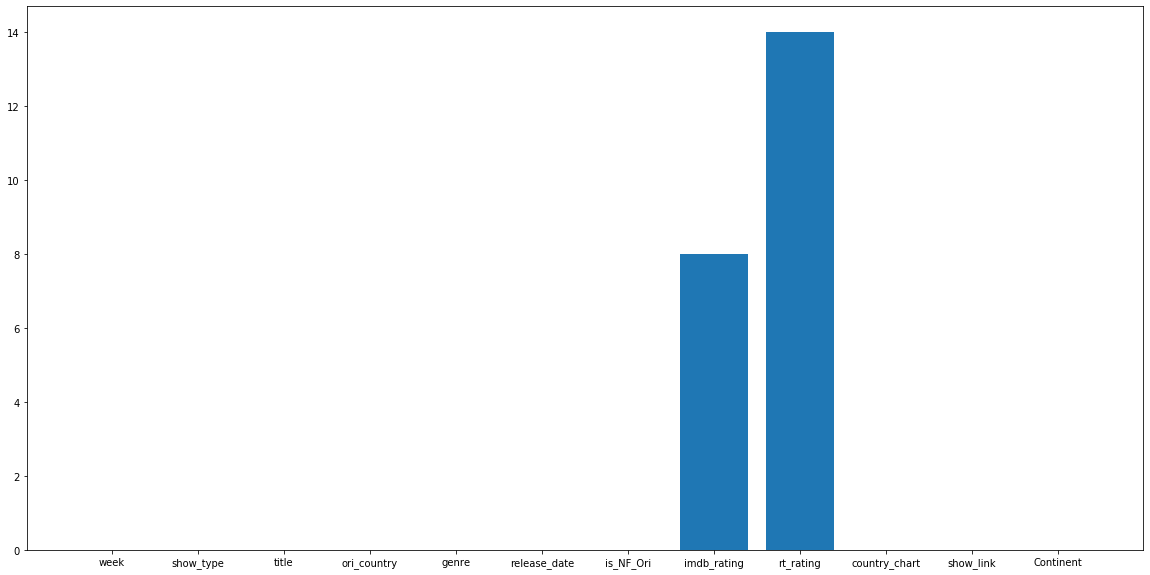

In [13]:
nan_columns = []
nan_values = []

for column in movie_ind.columns:
    
    nan_columns.append(column)
    nan_values.append(movie_ind[column].isnull().sum())
    

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(nan_columns, nan_values)
plt.show()

In [24]:
movie_ind.imdb_rating.values

array(['72%', '68%', nan, '68%', nan, '83%', '31%', '75%', '78%', '75%',
       '78%', '83%', '62%', '69%', nan, '69%', '82%', '87%', nan, '87%',
       '66%', '87%', '66%', '87%', '35%', '87%', '35%', '84%', nan, '70%',
       nan, nan, nan, '84%', '54%', '78%', '28%', '78%', '70%', '78%',
       '70%', '42%', '55%', '84%', '78%', '84%', '78%', '84%'],
      dtype=object)

In [65]:
movie_ind.columns


Index(['week', 'show_type', 'title', 'ori_country', 'genre', 'release_date',
       'is_NF_Ori', 'imdb_rating', 'rt_rating', 'country_chart', 'show_link',
       'Continent'],
      dtype='object')

In [94]:
movie_ind_no_null=movie_ind.loc[:,['show_type','ori_country','genre','release_date','imdb_rating','rt_rating','is_NF_Ori']].dropna()
movie_ind_no_null['imdb_rating']=movie_ind_no_null['imdb_rating'].apply(lambda x : float(x[0]))
movie_ind_no_null['rt_rating']=movie_ind_no_null['rt_rating'].apply(lambda x : float(x[0]))


In [99]:
movie_ind_no_null['show_type'].unique()

array(['Movie', 'TV Show'], dtype=object)

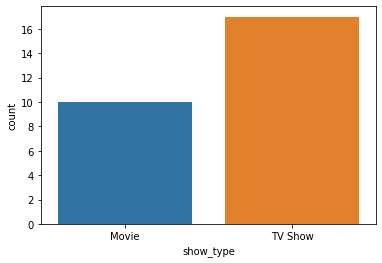

In [98]:
sns.countplot(movie_ind_no_null['show_type'])

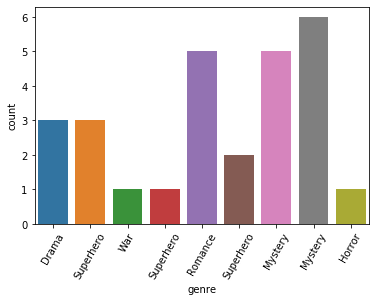

In [104]:
sns.countplot(movie_ind_no_null['genre']).set_xticklabels(movie_ind_no_null['genre'],rotation=60)
plt.show()

In [123]:
pd.crosstab(rownames=movie_ind_no_null['show_type'],colnames=[movie_ind_no_null['genre'],movie_ind_no_null['ori_country']])

TypeError: crosstab() missing 2 required positional arguments: 'index' and 'columns'

In [106]:
model=sm.ols('rt_rating~C(is_NF_Ori)+C(ori_country)+C(genre)',data=movie_ind_no_null).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rt_rating   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     12.40
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.86e-05
Time:                        12:30:56   Log-Likelihood:                -33.389
No. Observations:                  27   AIC:                             92.78
Df Residuals:                      14   BIC:                             109.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.0385      1.355      4.455      0.001       3.132       8.945
C(is_NF_Ori)[T.True]                -2.0000      1.637     -1.222      0.242      -5.510       1.510
C(ori_country)[T.India]             -2.0385      1.374     -1.483      0.160      -4.986       0.909
C(ori_country)[T.Italy]             -2.7885      1.267     -2.201      0.045      -5.506      -0.071
C(ori_country)[T.Spain]              4.9615      0.791      6.269      0.000       3.264       6.659
C(ori_country)[T.USA]                1.9615      0.668      2.937      0.011       0.529       3.394
C(ori_country)[T.United Kingdom]    -1.0192      0.618     -1.649      0.121      -2.345       0.306
C(genre)[T.Comedy]                   1.7500      1.002      1.746      0.103      -0.400       3.900
C(genre)[T.Drama]                   -3.0000      1.417     -2.117      0.053      -6.040       0.040
C(genre)[T.Horror]                   5.0000      2.004      2.494      0.026       0.701       9.299
C(genre)[T.Mystery]                  4.9615      0.762      6.514      0.000       3.328       6.595
C(genre)[T.Reality-Show]            -3.0000      1.417     -2.117      0.053      -6.040       0.040
C(genre)[T.Romance]                 -1.0192      0.618     -1.649      0.121      -2.345       0.306
C(genre)[T.Superhero]                2.0000      1.056      1.893      0.079      -0.266       4.266
C(genre)[T.War]                     -3.0000      2.165     -1.386      0.188      -7.644       1.644
==============================================================================
Omnibus:                       44.557   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.383
Skew:                          -3.000   Prob(JB):                     3.11e-49
Kurtosis:                      15.750   Cond. No.                     9.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.87e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""